In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [79]:
dataset = pd.read_csv("C:/Users/ssn/Documents/Machine Learning/Logistic Regression/Titanic.csv")

In [80]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
dataset = dataset.drop(['Name','Ticket','PassengerId','Cabin','Parch','SibSp'], axis = 1)

In [82]:
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [83]:
dataset = pd.get_dummies(dataset, columns = ['Sex', 'Embarked'])

In [84]:
dataset.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [85]:
import seaborn as sns

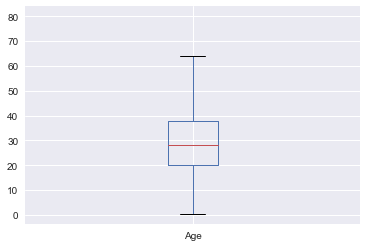

In [86]:
dataset['Age'].plot(kind="box")

In [87]:
dataset['Age'] = dataset['Age'].fillna(np.mean(dataset['Age']))

In [88]:
dataset.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [89]:
dataset.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,0,1
1,1,1,38.0,71.2833,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,0,1
4,0,3,35.0,8.0500,0,1,0,0,1


In [93]:
x = dataset.iloc[:, 1:9]

In [94]:
y = dataset.iloc[:,: 1]

In [95]:
x.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,1,0,0,1
1,1,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1
4,3,35.0,8.0500,0,1,0,0,1


In [96]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [99]:
dataset.skew(axis = 0, skipna = True)

Survived      0.478523
Pclass       -0.630548
Age           0.434488
Fare          4.787317
Sex_female    0.618921
Sex_male     -0.618921
Embarked_C    1.595149
Embarked_Q    2.948778
Embarked_S   -0.997083
dtype: float64

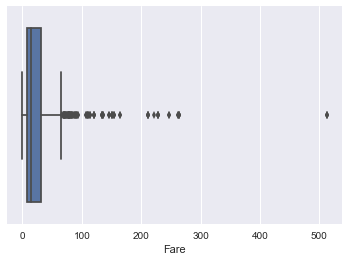

In [100]:
sns.boxplot(dataset['Fare'])


7.9104 31.0 23.0896


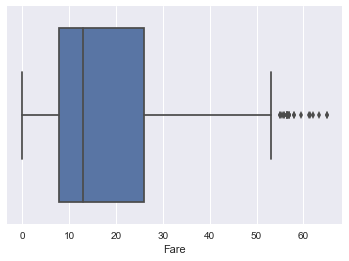

In [101]:
dataset_Fare_Q1 = dataset['Fare'].quantile(0.25)
dataset_Fare_Q3 = dataset['Fare'].quantile(0.75)
dataset_Fare_IQR =dataset_Fare_Q3 - dataset_Fare_Q1
print(dataset_Fare_Q1,dataset_Fare_Q3,dataset_Fare_IQR)
dataset = dataset[~((dataset.Fare<(dataset_Fare_Q1-1.5*dataset_Fare_IQR))|(dataset.Fare>(dataset_Fare_Q3+1.5*dataset_Fare_IQR)))]
sns.boxplot(x=dataset['Fare'])

0.0 1.0 1.0


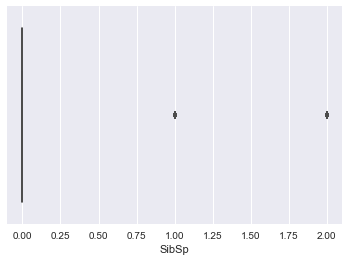

In [54]:
dataset_SibSp_Q1 = dataset['SibSp'].quantile(0.25)
dataset_SibSp_Q3 = dataset['SibSp'].quantile(0.75)
dataset_SibSp_IQR =dataset_SibSp_Q3 - dataset_SibSp_Q1
print(dataset_SibSp_Q1,dataset_SibSp_Q3,dataset_SibSp_IQR)
dataset = dataset[~((dataset.SibSp<(dataset_SibSp_Q1-1.5*dataset_SibSp_IQR))|(dataset.SibSp>(dataset_SibSp_Q3+1.5*dataset_SibSp_IQR)))]
sns.boxplot(x=dataset['SibSp'])

0.0 0.0 0.0


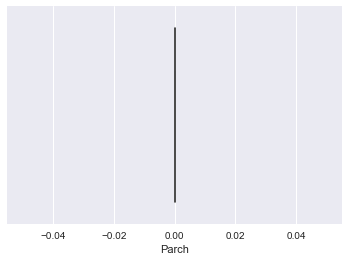

In [55]:
dataset_Parch_Q1 = dataset['Parch'].quantile(0.25)
dataset_Parch_Q3 = dataset['Parch'].quantile(0.75)
dataset_Parch_IQR =dataset_Parch_Q3 - dataset_Parch_Q1
print(dataset_Parch_Q1,dataset_Parch_Q3,dataset_Parch_IQR)
dataset = dataset[~((dataset.Parch<(dataset_Parch_Q1-1.5*dataset_Parch_IQR))|(dataset.Parch>(dataset_Parch_Q3+1.5*dataset_Parch_IQR)))]
sns.boxplot(x=dataset['Parch'])

0.0 0.0 0.0


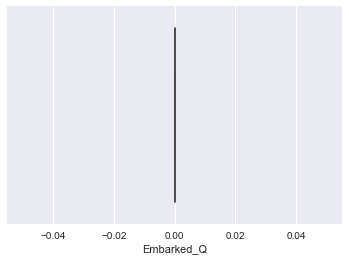

In [56]:
dataset_Embarked_Q_Q1 = dataset['Embarked_Q'].quantile(0.25)
dataset_Embarked_Q_Q3 = dataset['Embarked_Q'].quantile(0.75)
dataset_Embarked_Q_IQR =dataset_Embarked_Q_Q3 - dataset_Embarked_Q_Q1
print(dataset_Embarked_Q_Q1,dataset_Embarked_Q_Q3,dataset_Embarked_Q_IQR)
dataset = dataset[~((dataset.Embarked_Q<(dataset_Embarked_Q_Q1-1.5*dataset_Embarked_Q_IQR))|(dataset.Embarked_Q>(dataset_Embarked_Q_Q3+1.5*dataset_Embarked_Q_IQR)))]
sns.boxplot(x=dataset['Embarked_Q'])

In [102]:
dataset.skew(axis = 0, skipna = True)

Survived      0.679874
Pclass       -1.029597
Age           0.435012
Fare          1.430672
Sex_female    0.798880
Sex_male     -0.798880
Embarked_C    1.967750
Embarked_Q    2.733016
Embarked_S   -1.178993
dtype: float64

In [103]:
from sklearn.linear_model import LogisticRegression


In [104]:

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\ssn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
y_pred = classifier.predict(x_test)

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[151,  30],
       [ 29,  87]])

In [107]:
classifier.score(x_test, y_test)

0.80134680134680136

In [108]:

from sklearn.metrics import precision_recall_fscore_support

In [109]:
all=precision_recall_fscore_support(y_test, y_pred, average='macro')

In [110]:
all

(0.79123931623931631, 0.79212707182320441, 0.79167310641636846, None)

In [111]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(x_train,y_train)


C:\Users\ssn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [112]:
all=precision_recall_fscore_support(y_test, y_pred, average='macro')

In [113]:
all

(0.79123931623931631, 0.79212707182320441, 0.79167310641636846, None)

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [116]:
all=precision_recall_fscore_support(y_test, y_pred, average='macro')

In [117]:
all

(0.79123931623931631, 0.79212707182320441, 0.79167310641636846, None)

In [118]:
from sklearn.svm import SVC

In [119]:
classifier = SVC(kernel='linear')
classifier.fit(x_train,y_train)

C:\Users\ssn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
all=precision_recall_fscore_support(y_test, y_pred, average='macro')

In [121]:
all

(0.79123931623931631, 0.79212707182320441, 0.79167310641636846, None)